In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus']= False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [5]:
df =pd.read_csv('./pandas_project_소상공인상권정보_21년 6월_210819.csv')
df.head(2)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375
1,17174119,쓰리에프,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1159010700101390073009536,NaN,서울특별시 동작구 동작대로27가길 12,156816,7008.0,NaN,NaN,NaN,126.980952,37.487105


In [6]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [7]:
# 불필요한 컬럼 삭제
df.drop(['지점명', '상권업종대분류코드', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'], axis=1, inplace=True)
df.head()

,상가업소번호,상호명,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명
0,17174175,비지트,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11650,서초구
1,17174119,쓰리에프,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11590,동작구
2,17174096,채움,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11110,종로구
3,17174062,호구의주방,소매,D07,가정/주방/인테리어,D07A17,주방가구판매,G47520,가구 소매업,11,서울특별시,11560,영등포구
4,17174040,다향,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11650,서초구


In [8]:
df.drop(['상권업종중분류코드', '상권업종소분류코드', '표준산업분류코드','시도코드','시도명'], axis=1, inplace=True)
df.head()

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시군구코드,시군구명
0,17174175,비지트,음식,한식,한식/백반/한정식,한식 음식점업,11650,서초구
1,17174119,쓰리에프,음식,한식,한식/백반/한정식,한식 음식점업,11590,동작구
2,17174096,채움,음식,한식,한식/백반/한정식,한식 음식점업,11110,종로구
3,17174062,호구의주방,소매,가정/주방/인테리어,주방가구판매,가구 소매업,11560,영등포구
4,17174040,다향,음식,한식,한식/백반/한정식,한식 음식점업,11650,서초구


In [9]:
# 불필요한 컬럼 삭제
df.drop(['표준산업분류명'], axis=1, inplace=True)

In [10]:
# 필요정보 nan값 로우 삭제
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

상가업소번호      0
상호명         0
상권업종대분류명    0
상권업종중분류명    0
상권업종소분류명    0
시군구코드       0
시군구명        0
dtype: int64

In [12]:
# 음식정보만 따로 DataFrame 분리
df_meal = df[df['상권업종대분류명'] == '음식']

In [13]:
df_meal['상권업종중분류명'].unique()

array(['한식', '유흥주점', '커피점/카페', '패스트푸드', '닭/오리요리', '일식/수산물', '제과제빵떡케익',
       '분식', '양식', '별식/퓨전요리', '기타음식업', '부페', '중식', '음식배달서비스'],
      dtype=object)

In [14]:
# 불필요한 컬럼 삭제
df_meal.drop(['상권업종대분류명', '상권업종소분류명', '시군구코드'],axis=1, inplace=True)
df_meal

C:\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,상가업소번호,상호명,상권업종중분류명,시군구명
0,17174175,비지트,한식,서초구
1,17174119,쓰리에프,한식,동작구
2,17174096,채움,한식,종로구
4,17174040,다향,한식,서초구
11,17163092,도전최강달인왕만두,한식,강동구
...,...,...,...,...
316072,16982170,한그륵,한식,마포구
316073,16982165,김씨네주방,한식,서대문구
316074,16980995,핫플레이스,한식,마포구
316076,16991493,솔시카고피자,패스트푸드,동작구


In [42]:
df_meal.head()

,상가업소번호,상호명,상권업종중분류명,시군구명
0,17174175,비지트,한식,서초구
1,17174119,쓰리에프,한식,동작구
2,17174096,채움,한식,종로구
4,17174040,다향,한식,서초구
11,17163092,도전최강달인왕만두,한식,강동구


<AxesSubplot:xlabel='상권업종중분류명,시군구명'>

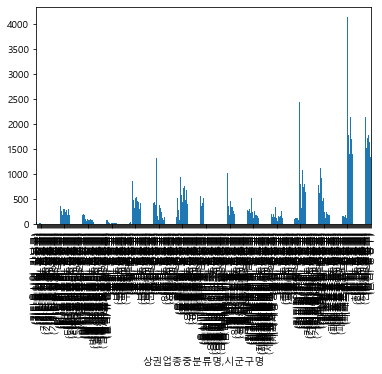

In [77]:
# 구별 음식점 근황에 대해서 표를 그리니 너무 표가 번잡해짐
df_meal.groupby(['상권업종중분류명','시군구명' ]).상호명.count().plot(kind='bar')

In [15]:
df_meal['상권업종중분류명'].unique()

array(['한식', '유흥주점', '커피점/카페', '패스트푸드', '닭/오리요리', '일식/수산물', '제과제빵떡케익',
       '분식', '양식', '별식/퓨전요리', '기타음식업', '부페', '중식', '음식배달서비스'],
      dtype=object)

In [16]:
# 음식점 분류별로 구별 현황 파악
df_meal_korea = df_meal[df_meal['상권업종중분류명']=='한식']
df_meal_china = df_meal[df_meal['상권업종중분류명']=='중식']

df_meal_alcohol = df_meal[df_meal['상권업종중분류명']=='유흥주점']
df_meal_cafe = df_meal[df_meal['상권업종중분류명']=='커피점/카페']

df_meal_fast = df_meal[df_meal['상권업종중분류명']=='패스트푸드']
df_meal_chicken = df_meal[df_meal['상권업종중분류명']=='닭/오리요리']
df_meal_japan = df_meal[df_meal['상권업종중분류명']=='일식/수산물']

df_meal_bread = df_meal[df_meal['상권업종중분류명']=='제과제빵떡케익']
df_meal_gimbab = df_meal[df_meal['상권업종중분류명']=='분식']
df_meal_western = df_meal[df_meal['상권업종중분류명']=='양식']

df_meal_fusion = df_meal[df_meal['상권업종중분류명']=='별식/퓨전요리']
df_meal_etc = df_meal[df_meal['상권업종중분류명']=='기타음식업']
df_meal_buffet = df_meal[df_meal['상권업종중분류명']=='부페']
df_meal_delivery = df_meal[df_meal['상권업종중분류명']=='음식배달서비스']

In [82]:
df_meal_korea

,상가업소번호,상호명,상권업종중분류명,시군구명
0,17174175,비지트,한식,서초구
1,17174119,쓰리에프,한식,동작구
2,17174096,채움,한식,종로구
4,17174040,다향,한식,서초구
11,17163092,도전최강달인왕만두,한식,강동구
...,...,...,...,...
316070,16993438,프리모프리,한식,용산구
316071,16982188,동명,한식,구로구
316072,16982170,한그륵,한식,마포구
316073,16982165,김씨네주방,한식,서대문구


In [83]:
df_meal_china

,상가업소번호,상호명,상권업종중분류명,시군구명
709,20665198,산동성,중식,은평구
1425,19983941,용궁,중식,도봉구
1539,20035668,향림각중화요리,중식,영등포구
2285,20018975,자금성,중식,성동구
2528,20026304,중화요리일품,중식,강남구
...,...,...,...,...
315841,16984313,미혜식당,중식,서대문구
315842,16985350,중화가정,중식,용산구
315843,16983961,황비홍마라탕,중식,동작구
315961,23775671,색다른탕수육,중식,노원구


<AxesSubplot:xlabel='시군구명'>

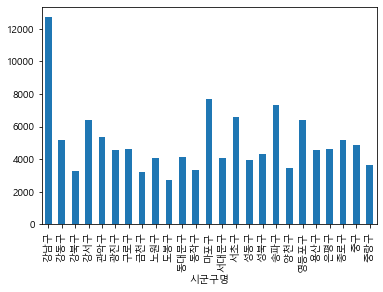

In [59]:
# 한식분류 음식점의 음식점 현황
df_meal_korea.groupby('시군구명').상호명.count().plot(kind='bar')

<AxesSubplot:xlabel='시군구명'>

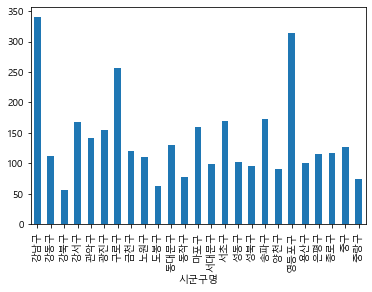

In [84]:
# 중식분류 음식점의 음식점 현황
df_meal_china.groupby('시군구명').상호명.count().plot(kind='bar')

<AxesSubplot:xlabel='상권업종중분류명'>

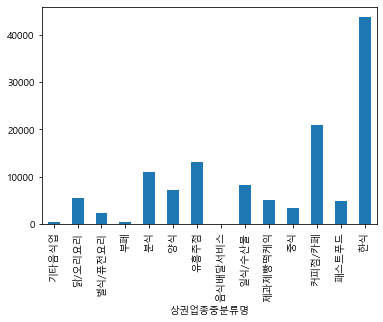

In [85]:
# 서울의 전체 음식점 분류별 현황
df_meal.groupby('상권업종중분류명').상호명.count().plot(kind='bar')

<AxesSubplot:xlabel='시군구명'>

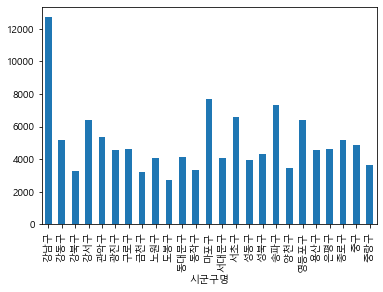

In [17]:
# 구별 음식점 현황
df_meal.groupby('시군구명').상호명.count().plot(kind='bar')